# Redes Neuronales
## Preparacion de datos para el modelo

In [34]:
import sys
sys.path.append('../')

import Utilidades as ut
import Modelos as md
import numpy as np
import pandas as pd


df_train = pd.read_pickle("../Archivos/Neuronales_entrenamiento.pkl")
df_test = pd.read_pickle("../Archivos/Neuronales_validacion.pkl")

x_train, y_train = ut.split_labels(df_train)
x_test, y_test = ut.split_labels(df_test)

#Convertimos las fechas a numeros (cantidad de dias transcurridos) y luego las normalizamos
#x_train, x_test = ut.conversion_fechas(x_train, x_test)
#x_train, x_test = ut.codificar_categoricas(x_train, y_train, x_test)
#x_train, x_test = ut.normalizacion_numericas(x_train, x_test, modo='normalizacion')

x_train.head(3)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Buro_Approved_by_Billing_Country_mean,Buro_Approved_by_Billing_Country_std,Opportunity_Duration_by_Product_Family_mean,Opportunity_Duration_by_Product_Family_std,Total_Amount_by_Product_Family_mean,Total_Amount_by_Product_Family_std,Buro_Approved_by_Product_Family,Family_Duration,Region_Duration,Territory_Duration
0,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,0.246835,0.431854,231.896694,113.273701,2.662164e+05,5.108615e+05,0.446370,-713.0,-1106,-1085.0
1,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,2014-01-22,...,0.307380,0.461596,227.637202,144.868574,3.011984e+06,1.178595e+07,0.442007,-1282.0,-2072,-1261.0
2,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-08-22,...,0.305915,0.460884,220.969543,181.414190,6.810823e+06,2.429178e+07,0.495553,-1053.0,-1795,-1795.0


In [35]:
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.target_encoder import TargetEncoder


columnas = df_train.select_dtypes(include='category').columns
encoder = TargetEncoder(return_df=True, cols=columnas)
sarasa = encoder.fit(x_train, y_train)
x_train

/home/julian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Buro_Approved_by_Billing_Country_mean,Buro_Approved_by_Billing_Country_std,Opportunity_Duration_by_Product_Family_mean,Opportunity_Duration_by_Product_Family_std,Total_Amount_by_Product_Family_mean,Total_Amount_by_Product_Family_std,Buro_Approved_by_Product_Family,Family_Duration,Region_Duration,Territory_Duration
0,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,0.246835,0.431854,231.896694,113.273701,2.662164e+05,5.108615e+05,0.446370,-713.0,-1106,-1085.0
1,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,2014-01-22,...,0.307380,0.461596,227.637202,144.868574,3.011984e+06,1.178595e+07,0.442007,-1282.0,-2072,-1261.0
2,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-08-22,...,0.305915,0.460884,220.969543,181.414190,6.810823e+06,2.429178e+07,0.495553,-1053.0,-1795,-1795.0
3,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-08-22,...,0.305915,0.460884,220.969543,181.414190,6.810823e+06,2.429178e+07,0.495553,-1084.0,-1826,-1826.0
4,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,2013-08-22,...,0.305915,0.460884,268.402985,163.865255,3.454407e+06,9.303901e+06,0.499851,-1364.0,-2008,-2038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12076,20616,Americas,Central US,1,0,0,0,0,Bureaucratic_Code_5,2013-08-22,...,0.305915,0.460884,152.858333,82.009970,2.149203e+04,5.028947e+04,0.460179,-832.0,-1242,-574.0
12077,20642,Americas,Central US,1,1,0,0,0,Bureaucratic_Code_4,2013-08-22,...,0.305915,0.460884,165.431818,75.534498,7.303231e+05,1.443275e+06,0.254972,-408.0,-1205,-537.0
12078,20619,Americas,Central US,1,0,0,0,0,Bureaucratic_Code_5,2013-08-22,...,0.305915,0.460884,231.896694,113.273701,2.662164e+05,5.108615e+05,0.446370,-972.0,-1242,-574.0
12079,8546,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,2017-09-14,...,0.156338,0.363223,237.292453,132.292686,5.628536e+06,4.608606e+07,0.441924,-1158.0,-1289,-1257.0


In [33]:
x_train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Buro_Approved_by_Billing_Country_mean,Buro_Approved_by_Billing_Country_std,Opportunity_Duration_by_Product_Family_mean,Opportunity_Duration_by_Product_Family_std,Total_Amount_by_Product_Family_mean,Total_Amount_by_Product_Family_std,Buro_Approved_by_Product_Family,Family_Duration,Region_Duration,Territory_Duration
0,-0.85,-3.71,-2.20,-2.05,-1.13,-0.90,-0.64,0.0,-2.06,-1.35,...,-0.31,0.08,-0.01,-0.43,-0.75,-0.64,0.26,0.61,1.97,0.84
1,0.02,-3.71,-2.20,0.49,0.88,1.11,1.56,0.0,-2.06,-0.96,...,0.11,0.54,-0.12,0.46,0.40,0.31,0.22,-0.82,-1.65,0.41
2,0.30,-3.71,-2.20,0.49,-1.13,1.11,-0.64,0.0,-2.06,-1.29,...,0.10,0.53,-0.28,1.48,1.99,1.37,0.69,-0.25,-0.61,-0.90
3,0.31,-3.71,-2.20,0.49,-1.13,1.11,-0.64,0.0,-2.06,-1.29,...,0.10,0.53,-0.28,1.48,1.99,1.37,0.69,-0.32,-0.73,-0.98
4,0.28,-3.71,-2.20,0.49,-1.13,1.11,-0.64,0.0,-2.06,-1.29,...,0.10,0.53,0.86,0.99,0.59,0.10,0.73,-1.03,-1.41,-1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12076,0.30,-0.27,0.02,0.49,-1.13,-0.90,-0.64,0.0,-1.26,-1.29,...,0.10,0.53,-1.91,-1.30,-0.85,-0.68,0.38,0.31,1.46,2.10
12077,0.30,-0.27,0.04,0.49,0.88,-0.90,-0.64,0.0,0.62,-1.29,...,0.10,0.53,-1.61,-1.48,-0.55,-0.56,-1.45,1.38,1.60,2.19
12078,0.30,-0.27,0.06,0.49,-1.13,-0.90,-0.64,0.0,-1.26,-1.29,...,0.10,0.53,-0.01,-0.43,-0.75,-0.64,0.26,-0.04,1.46,2.10
12079,-1.45,1.60,0.45,0.49,0.88,-0.90,-0.64,0.0,0.62,1.92,...,-0.93,-1.00,0.12,0.10,1.50,3.20,0.22,-0.51,1.29,0.42


## Creacion del modelo.

In [15]:
import keras
import tensorflow as tf
#from keras import backend
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout
#from keras.regularizers import l1
#from keras.regularizers import l2
#from keras.regularizers import l1_l2


x_train_vector = ut.df_a_vector(x_train)
y_train_vector = ut.df_a_vector(y_train)
x_test_vector = ut.df_a_vector(x_test)
y_test_vector = ut.df_a_vector(y_test)

#input_dim = x_train.shape[1]
#
#alfa = 1e-3
#
#model = Sequential()
#model.add(Dense(64, input_dim=input_dim, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(128, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='relu'))
##model.add(Dropout(0.25))
##model.add(Dense(256, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='tanh'))
#model.add(Dropout(0.5))
#model.add(Dense(128, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='tanh'))
#model.add(Dropout(0.25))
#model.add(Dense(16, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='relu'))
#model.add(Dense(8, kernel_regularizer=l1(alfa), bias_regularizer=l1(alfa), activation='relu'))
#model.add(Dense(1, activation='tanh'))
#
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#
#backend.set_value(model.optimizer.learning_rate, 5e-4)

best_hparams = ut.hyperparams_from_json('../Archivos/Neuronales')
model = md.get_neural_network_model(best_hparams, x_train.shape[1])

epochs = 250
batch_size = 256


my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint("Neuronales_Mejor_Modelo.hdf5", 
                                       monitor='val_loss', 
                                       verbose=0,
                                       save_best_only=True, 
                                       mode='min'),
    
    #tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
    #                                 min_delta=0.01,
    #                                 mode='min',
    #                                 patience=10),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                      mode='min',
                                      factor=0.5,
                                      patience=5,
                                      cooldown=0, 
                                      min_lr=1e-24)
]

fit_dict = {
    #'x' : x_train_vector,
    #'y' : y_train_vector,
    #'validation_data' : (x_test_vector, y_test_vector),
    'epochs' : epochs,
    'batch_size' : batch_size,
    'verbose' : 1,
    'callbacks' : my_callbacks
}


history = model.fit(x_train_vector,
                    y_train_vector,
                    validation_data=(x_test_vector, y_test_vector),
                    **fit_dict)


Cargando hiperparametros desde el archivo: '../Archivos/Neuronales_best_hyperparam.json'
Epoch 1/250
48/48 [==============================] - 1s 17ms/step - loss: 2655.6018 - val_loss: 775.9537 - lr: 0.0022
Epoch 2/250
48/48 [==============================] - 1s 15ms/step - loss: 228.2518 - val_loss: 33.2166 - lr: 0.0022
Epoch 3/250
48/48 [==============================] - 1s 16ms/step - loss: 21.4239 - val_loss: 17.4182 - lr: 0.0022
Epoch 4/250
48/48 [==============================] - 1s 16ms/step - loss: 17.0368 - val_loss: 17.0190 - lr: 0.0022
Epoch 5/250
48/48 [==============================] - 1s 15ms/step - loss: 16.9447 - val_loss: 17.0383 - lr: 0.0022
Epoch 6/250
48/48 [==============================] - 1s 17ms/step - loss: 16.9473 - val_loss: 17.0842 - lr: 0.0022
Epoch 7/250
48/48 [==============================] - 1s 18ms/step - loss: 16.9292 - val_loss: 16.9428 - lr: 0.0022
Epoch 8/250
48/48 [==============================] - 1s 16ms/step - loss: 16.9123 - val_loss: 17.0528 

In [ ]:
#model.save('Neuronales_7740.h5')

## Resultados

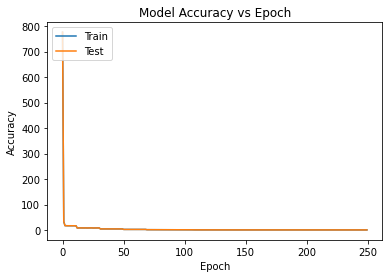

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#new_model = keras.models.load_model('Neuronales_Mejor_Modelo.hdf5')
#new_predictions = new_model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = [a > 0.5 for a in model.predict(x_test_vector)]


score = accuracy_score(y_pred, y_test_vector)
score

0.6053156146179401

In [19]:
model.evaluate(x_test_vector, y_test_vector)#, metrics=['accuracy'])

142/142 [==============================] - 0s 3ms/step - loss: 0.6791


0.6791225075721741